# **Crawling Situs Berita 3 Kategori Sumber: radarjatim.com**

### 1.Install package dan requirements
Jika pada pc anda belum terinstall package requests maka melakukan langkah awal installasi requests yang bertujuan untuk mengirim permintaan HTTP ke server.

In [ ]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

### 2. Memilih 3 Category yang akan di crawling dari radarjatim.com
Crawling merupakan alat otomatis yang mengumpulkan beragam informasi dengan menjelajahi berbagai halaman web. Proses ini mencakup identifikasi serta ekstraksi elemen-elemen seperti teks, gambar, dan unsur lainnya, sehingga membentuk pemahaman menyeluruh tentang konten yang tersebar di internet.

In [ ]:
kategori_list =  ['religi', 'sosial', 'pendidikan']
k =  ['Religi', 'Sosial', 'Pendidikan']

jumlah_halaman = 15

 # contoh scraping 5 halaman

def scraping_berita(kategori_list, halaman):
    with open('CrawlingBerita.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul', 'Content', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()


        for kategori in kategori_list:
            for page in range(1, halaman + 1):
                url = f'https://radarjatim.id/category/{kategori}/page/{page}/'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='jnews_category_content_wrapper').find('div', class_='jeg_block_container').find('div', class_='jeg_posts jeg_load_more_flag')
                berita_list = list_berita.find_all('article')
                for berita in berita_list:
                    link = berita.find('div', class_='jeg_postblock_content').find('div', class_='jeg_post_excerpt').find('a')['href']
                    headline = berita.find('div', class_='jeg_postblock_content').find('h3', class_='jeg_post_title').find('a').text
                    category = berita.find('div', class_='jeg_thumb').find('div', class_='jeg_post_category').find('span').find('a').text
                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find('div', class_='content-inner')
                    if category not in k :
                        print(f"Kategori dilewati.")
                        continue
                    if content_elem:
                        content_list = [p.text.strip() for p in content_elem.find_all('p') if p.text.strip()]
                        artikel = ' '.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').strip()
                    else:
                          artikel = ''
                    print(f"Data berhasil diambil - Kategori: {category}, Halaman: {page}, Judul: {headline}")

                    writer.writerow({'Judul': headline, 'Content': artikel, 'Category': category})

scraping_berita(kategori_list, jumlah_halaman)

Data berhasil diambil - Kategori: Religi, Halaman: 1, Judul: Bupati Galang Bantuan Palestina Terkumpul Rp 5 M
Kategori dilewati.
Kategori dilewati.
Kategori dilewati.
Data berhasil diambil - Kategori: Religi, Halaman: 1, Judul: Spirit Hari Pahlawan, Nurul Hayat Gelar Silaturahmi Akbar Guru Quran dan Galang Dana untuk Rakyat Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: Implementasikan P5 Siswa SMA YPM 2 Sukodono Observasi Antar Agama
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: MI Al Abror Kauman Shalat Ghoib dan Doa Bersama Untuk Pejuang Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: Siswa MTs dan MA  NU Sholat Ghaib Buat Syuhada Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: Santri Putri PP Jabal Nur Juara I  Duta Santri Pelajar NU 2023
Data berhasil diambil - 

## **Preprocessing**
Data Preprocessing merupakan salah satu tahapan dalam melakukan mining data. Sebelum menuju ke tahap pemprosesan. Data mentah akan diolah terlebih dahulu. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai. Selain itu dalam proses ini data akan diubah dalam bentuk yang akan lebih dipahami oleh sistem.

### 1.Install Package
Hal yang harus dilakukan adalah install libraray yang dibutuhkan.





In [30]:
import os
import pandas as pd
import numpy as np
import gdown
import string

### 2.Read Data

In [31]:
df = pd.read_csv('/content/drive/MyDrive/projectPPW/tugas/CrawlingBerita (2).csv')
df

,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


### 3.Cleaning Data
Cleansing data adalah proses membersihkan dan mempersiapkan data untuk analisis atau pemrosesan lebih lanjut. Tujuan dari cleaning data adalah untuk mengatasi masalah-masalah seperti keberadaan data yang hilang, format yang tidak sesuai, atau adanya outliers yang dapat mempengaruhi kualitas analisis.

#### Cek Jumlah Category

In [32]:
# Hitung jumlah kelas
kelas = df['Category'].value_counts()
kelas

Pendidikan    390
Religi        186
Sosial        174
Name: Category, dtype: int64

#### Cek Missing Value

In [33]:
df.isnull().sum()

Judul       0
Content     2
Category    0
dtype: int64

#### Cek Duplikasi Kalimat

In [34]:
df.duplicated().sum()

54

#### Cleansing

In [35]:
import re
df['Clean_Content'] = df['Content'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Judul,Content,Category,Clean_Content
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi,sidoarjo radarjatim.id bupati sidoarjo ahmad...
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi,gresik radarjatim.id momentum hari pahlawan 1...
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan,sidoarjo radarjatim.id. siswa dan siswi kelas...
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan,sidoarjo radarjatim.id mi maarif pagerwojo me...
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan,sidoarjo radarjatim.id shalat ghoib dan doa b...
...,...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan,sidoarjo radarjatim.id sekitar 1.500 peserta ...
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan,sidoarjo radarjatim.id bertujuan untuk member...
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan,surabaya radarjatim.id yayasan barunawati bir...
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan,gresik radarjatim.id saat ini budi daya maggo...


#### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi unit-unit kecil yang disebut token. Token bisa berupa kata, frasa, kalimat, atau entitas lain tergantung pada tingkat granularitas yang diinginkan. Proses ini merupakan langkah awal dalam pemrosesan teks dan dapat membantu analisis lebih lanjut, ekstraksi fitur, atau pemodelan bahasa.

In [36]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
df["tokenizing"] = df['Clean_Content'].apply(lambda x: sent_tokenize(str(x)))
df

,Judul,Content,Category,Clean_Content,tokenizing
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi,sidoarjo radarjatim.id bupati sidoarjo ahmad...,[sidoarjo radarjatim.id bupati sidoarjo ahma...
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi,gresik radarjatim.id momentum hari pahlawan 1...,[gresik radarjatim.id momentum hari pahlawan ...
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan,sidoarjo radarjatim.id. siswa dan siswi kelas...,"[sidoarjo radarjatim.id., siswa dan siswi kela..."
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan,sidoarjo radarjatim.id mi maarif pagerwojo me...,[sidoarjo radarjatim.id mi maarif pagerwojo m...
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan,sidoarjo radarjatim.id shalat ghoib dan doa b...,[sidoarjo radarjatim.id shalat ghoib dan doa ...
...,...,...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan,sidoarjo radarjatim.id sekitar 1.500 peserta ...,[sidoarjo radarjatim.id sekitar 1.500 peserta...
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan,sidoarjo radarjatim.id bertujuan untuk member...,[sidoarjo radarjatim.id bertujuan untuk membe...
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan,surabaya radarjatim.id yayasan barunawati bir...,[surabaya radarjatim.id yayasan barunawati bi...
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan,gresik radarjatim.id saat ini budi daya maggo...,[gresik radarjatim.id saat ini budi daya magg...


In [38]:
len(df['tokenizing'])

750

### 3.TF-IDF
Semakin tinggi nilai TF-IDF suatu kata dalam suatu dokumen, semakin penting kata tersebut dalam konteks dokumen tersebut dan koleksi dokumen secara keseluruhan. Metode ini sering digunakan dalam representasi fitur teks untuk analisis teks, klasifikasi dokumen, dan tugas-tugas pemrosesan teks lainnya.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer

In [42]:
tfidf_results = []
tfidf_vectorizer = TfidfVectorizer()

for i in range(len(df['tokenizing'])):
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenizing'][i])
    tfidf_results.append(tfidf_matrix)

for idoc, tfidf_matrix in enumerate(tfidf_results):
    print(f'================================ Dokumen ke-{idoc} ================================')


    arr_tfidf_results = tfidf_matrix.toarray()

    for index, hasil_tfidf in enumerate(arr_tfidf_results):

        print(f'TF-IDF Kalimat ke-{index + 1}: {list(hasil_tfidf)}')
    print('\n')


Output hidden; open in https://colab.research.google.com to view.

### 4. Cossine Simmilarity
Merupakan metode untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Biasanya, cosine similarity digunakan dalam pemrosesan bahasa alami dan pengelompokan dokumen untuk menentukan seberapa serupa atau berbeda dua dokumen berdasarkan representasi vektor mereka.



In [43]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [44]:
cos_sim_result = []
graf_result = []
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):


  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc])

  for i_hasil in range(len(cos_sim)):
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)):
      if cos_sim[i_hasil][j_hasil] > treshold:


        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]])
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil])

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
   #print('\n')

In [45]:
for i, cos_sim_now in enumerate(cos_sim_result):
    print(f'============= Document ke - {i} ==============')

    for j, similar_pairs in enumerate(cos_sim_now):
        for idx1, idx2, hasil in similar_pairs:
            print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')

    print('\n')

Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 7 : 29 = 0.2104237103137487
Cosine Similarity Kalimat 7 : 34 = 0.10147010362348588
Cosine Similarity Kalimat 8 : 15 = 0.10072131703999498
Cosine Similarity Kalimat 8 : 17 = 0.1187855921069486
Cosine Similarity Kalimat 8 : 19 = 0.08731395295136056
Cosine Similarity Kalimat 8 : 22 = 0.19007409928677033
Cosine Similarity Kalimat 8 : 23 = 0.09683422211816026
Cosine Similarity Kalimat 8 : 27 = 0.10989265510882054
Cosine Similarity Kalimat 8 : 34 = 0.08191558456207869
Cosine Similarity Kalimat 8 : 35 = 0.1457547700419903
Cosine Similarity Kalimat 9 : 11 = 0.09626377924931219
Cosine Similarity Kalimat 9 : 13 = 0.1411488562354363
Cosine Similarity Kalimat 9 : 14 = 0.08225980714625797
Cosine Similarity Kalimat 9 : 15 = 0.12322826079174345
Cosine Similarity Kalimat 9 : 16 = 0.13403549770048165
Cosine Similarity Kalimat 9 : 18 = 0.08308162058663345
Cosine Similarity Kalimat 9 : 19 = 0.08153377341164514
Cosine Similarity 

### 5.Closeness Centrality
Salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.

In [47]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 1: 0.1,
 6: 0.4166666666666667,
 8: 0.2,
 10: 0.44545454545454544,
 2: 0.13333333333333333,
 3: 0.22499999999999998,
 4: 0.26666666666666666,
 5: 0.4166666666666667,
 7: 0.5444444444444444,
 9: 0.3272727272727272}

In [49]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

Streaming output truncated to the last 5000 lines.
Closenes Centrality Node 10 = 0.17307692307692307
Closenes Centrality Node 11 = 0.4188034188034188
Closenes Centrality Node 13 = 0.34615384615384615
Closenes Centrality Node 2 = 0.10256410256410256
Closenes Centrality Node 7 = 0.32051282051282054
Closenes Centrality Node 4 = 0.17582417582417584
Closenes Centrality Node 5 = 0.11538461538461539
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 12 = 0.17482517482517482
Closenes Centrality Node 8 = 0.3141025641025641
Closenes Centrality Node 6 = 0.12307692307692308


========= document ke-497 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.1
Closenes Centrality Node 6 = 0.3
Closenes Centrality Node 8 = 0.32000000000000006
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 7 = 0.1
Closenes Centrality Node 9 = 0.35714285714285715
Closenes Centrality Node 11 = 0.3368421052631579
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 4 = 0.0
Cl

Menampilkan graf hanya 3 dokumen sebagai sample

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1
Closenes Centrality Node 6 = 0.4166666666666667
Closenes Centrality Node 8 = 0.2
Closenes Centrality Node 10 = 0.44545454545454544
Closenes Centrality Node 2 = 0.13333333333333333
Closenes Centrality Node 3 = 0.22499999999999998
Closenes Centrality Node 4 = 0.26666666666666666
Closenes Centrality Node 5 = 0.4166666666666667
Closenes Centrality Node 7 = 0.5444444444444444
Closenes Centrality Node 9 = 0.3272727272727272


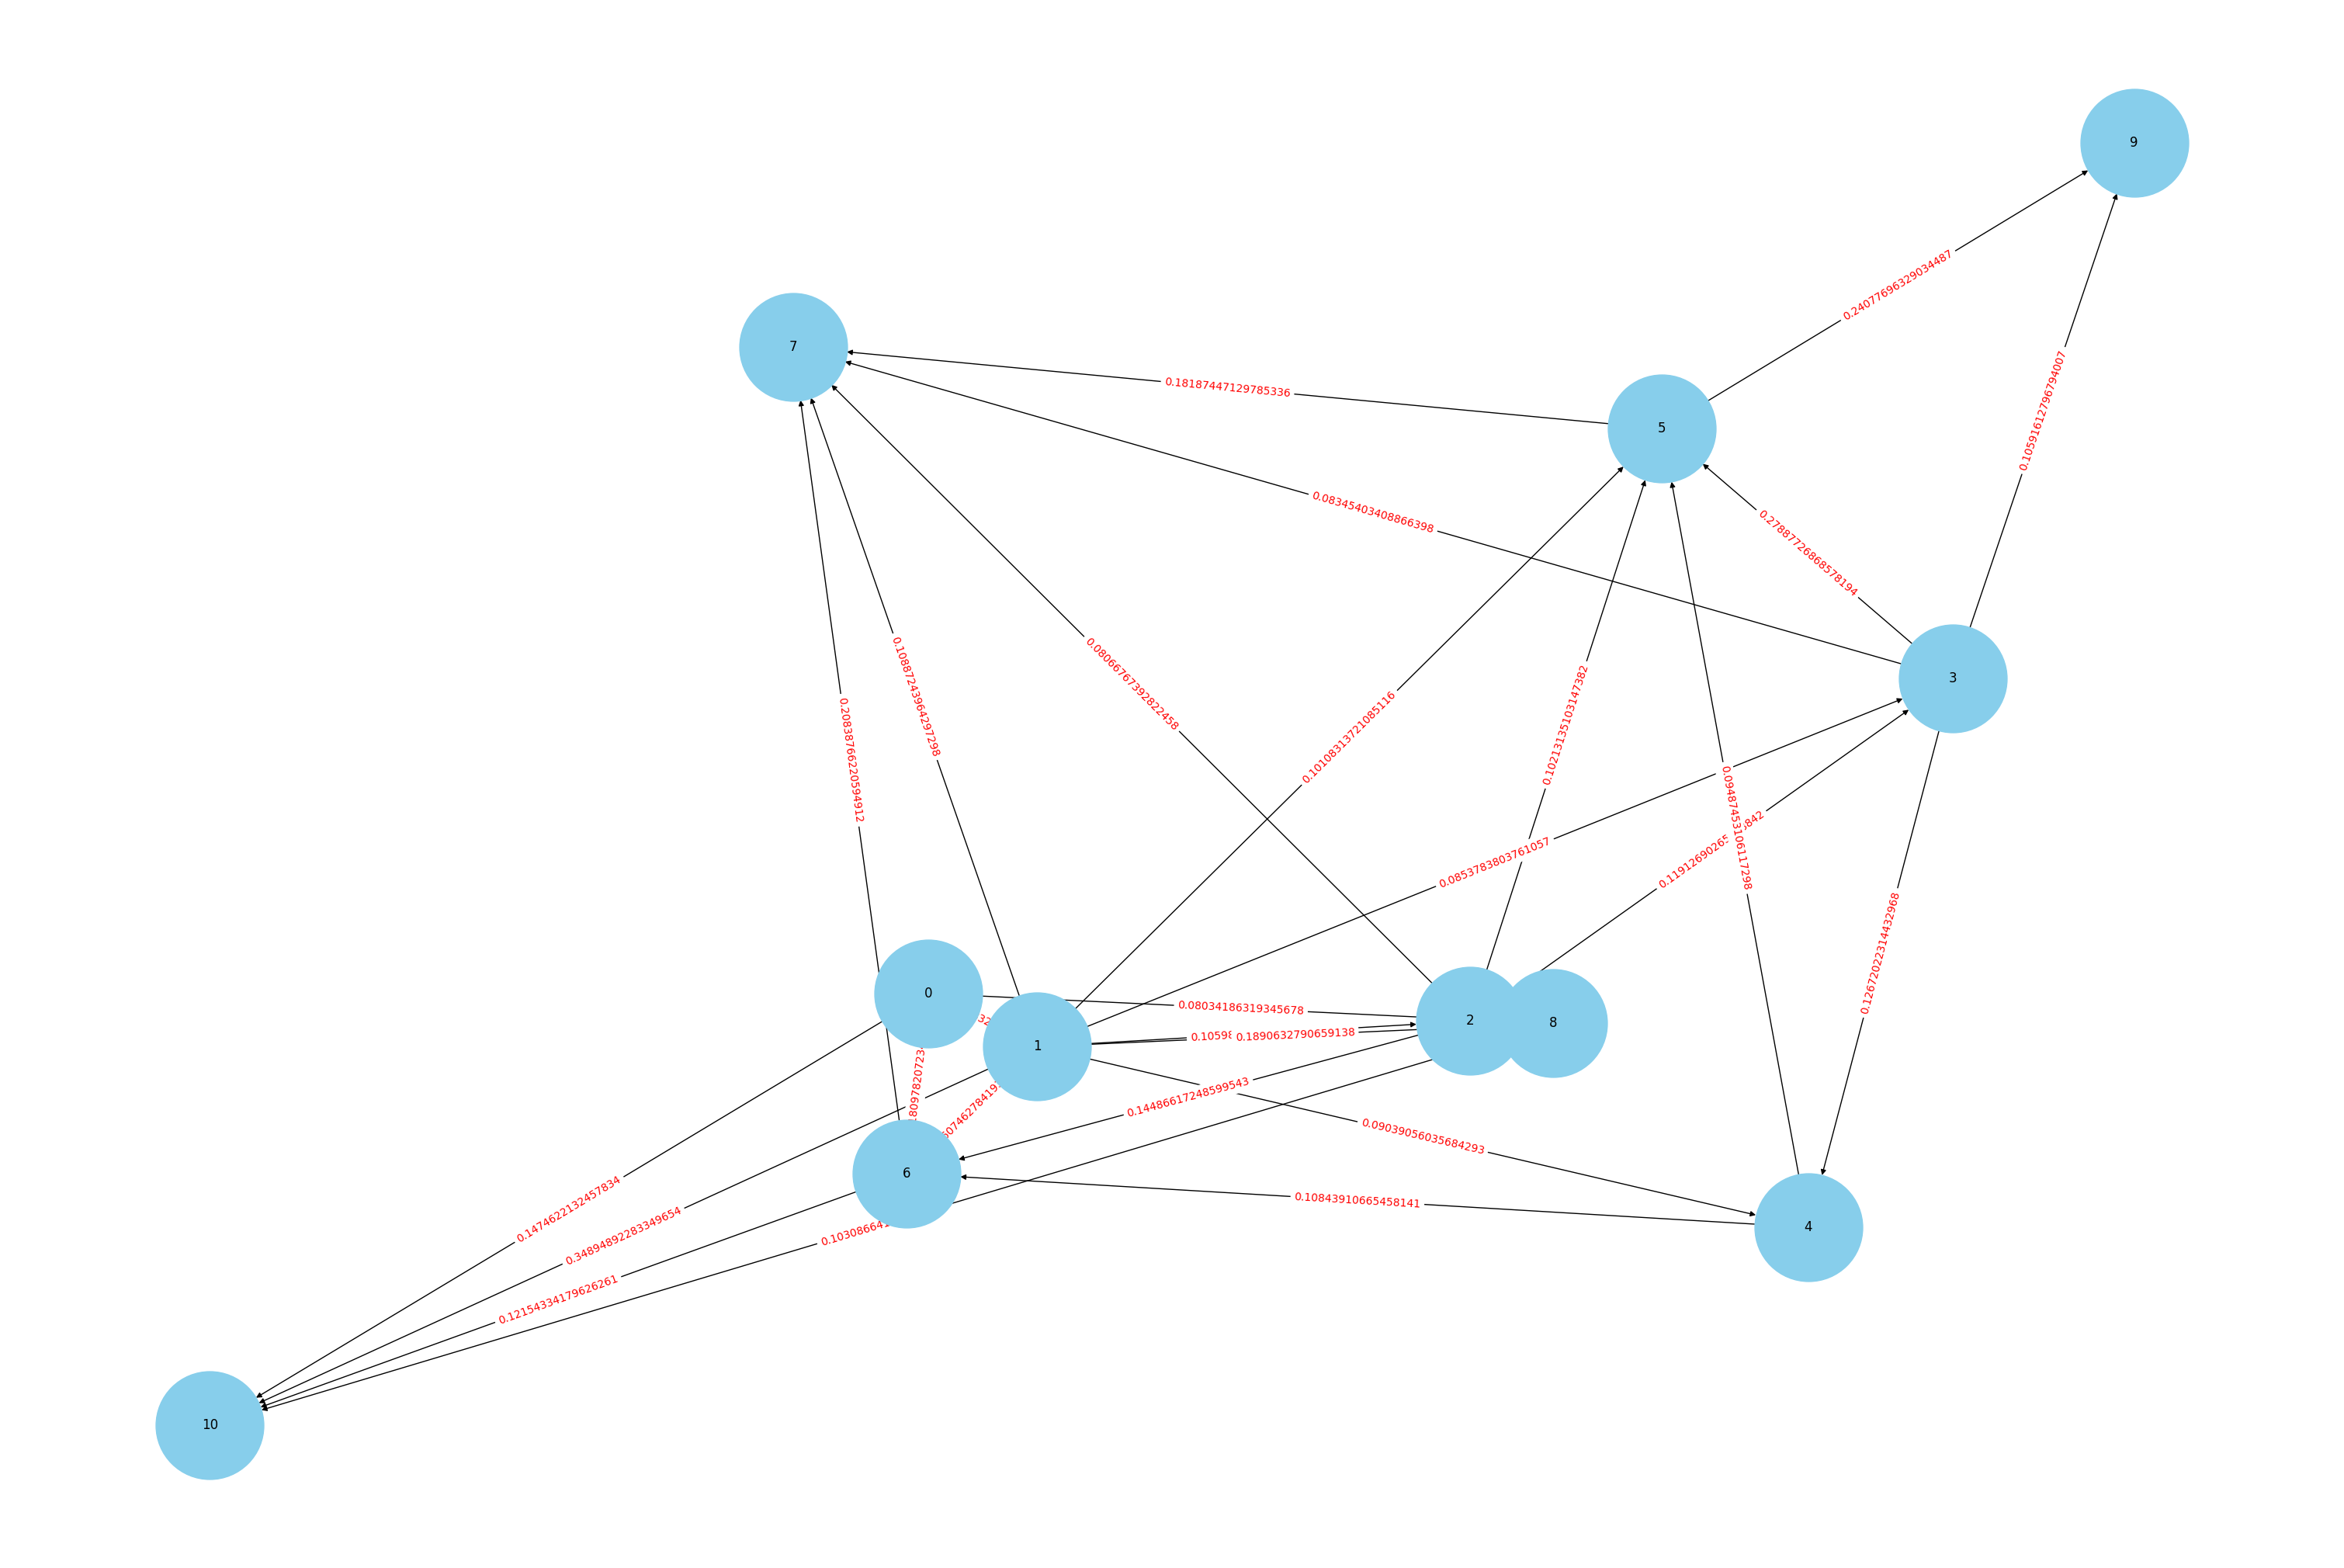



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.14285714285714285
Closenes Centrality Node 4 = 0.45714285714285713
Closenes Centrality Node 2 = 0.19047619047619047
Closenes Centrality Node 3 = 0.3214285714285714
Closenes Centrality Node 8 = 0.5714285714285714
Closenes Centrality Node 9 = 0.5833333333333334
Closenes Centrality Node 7 = 0.0


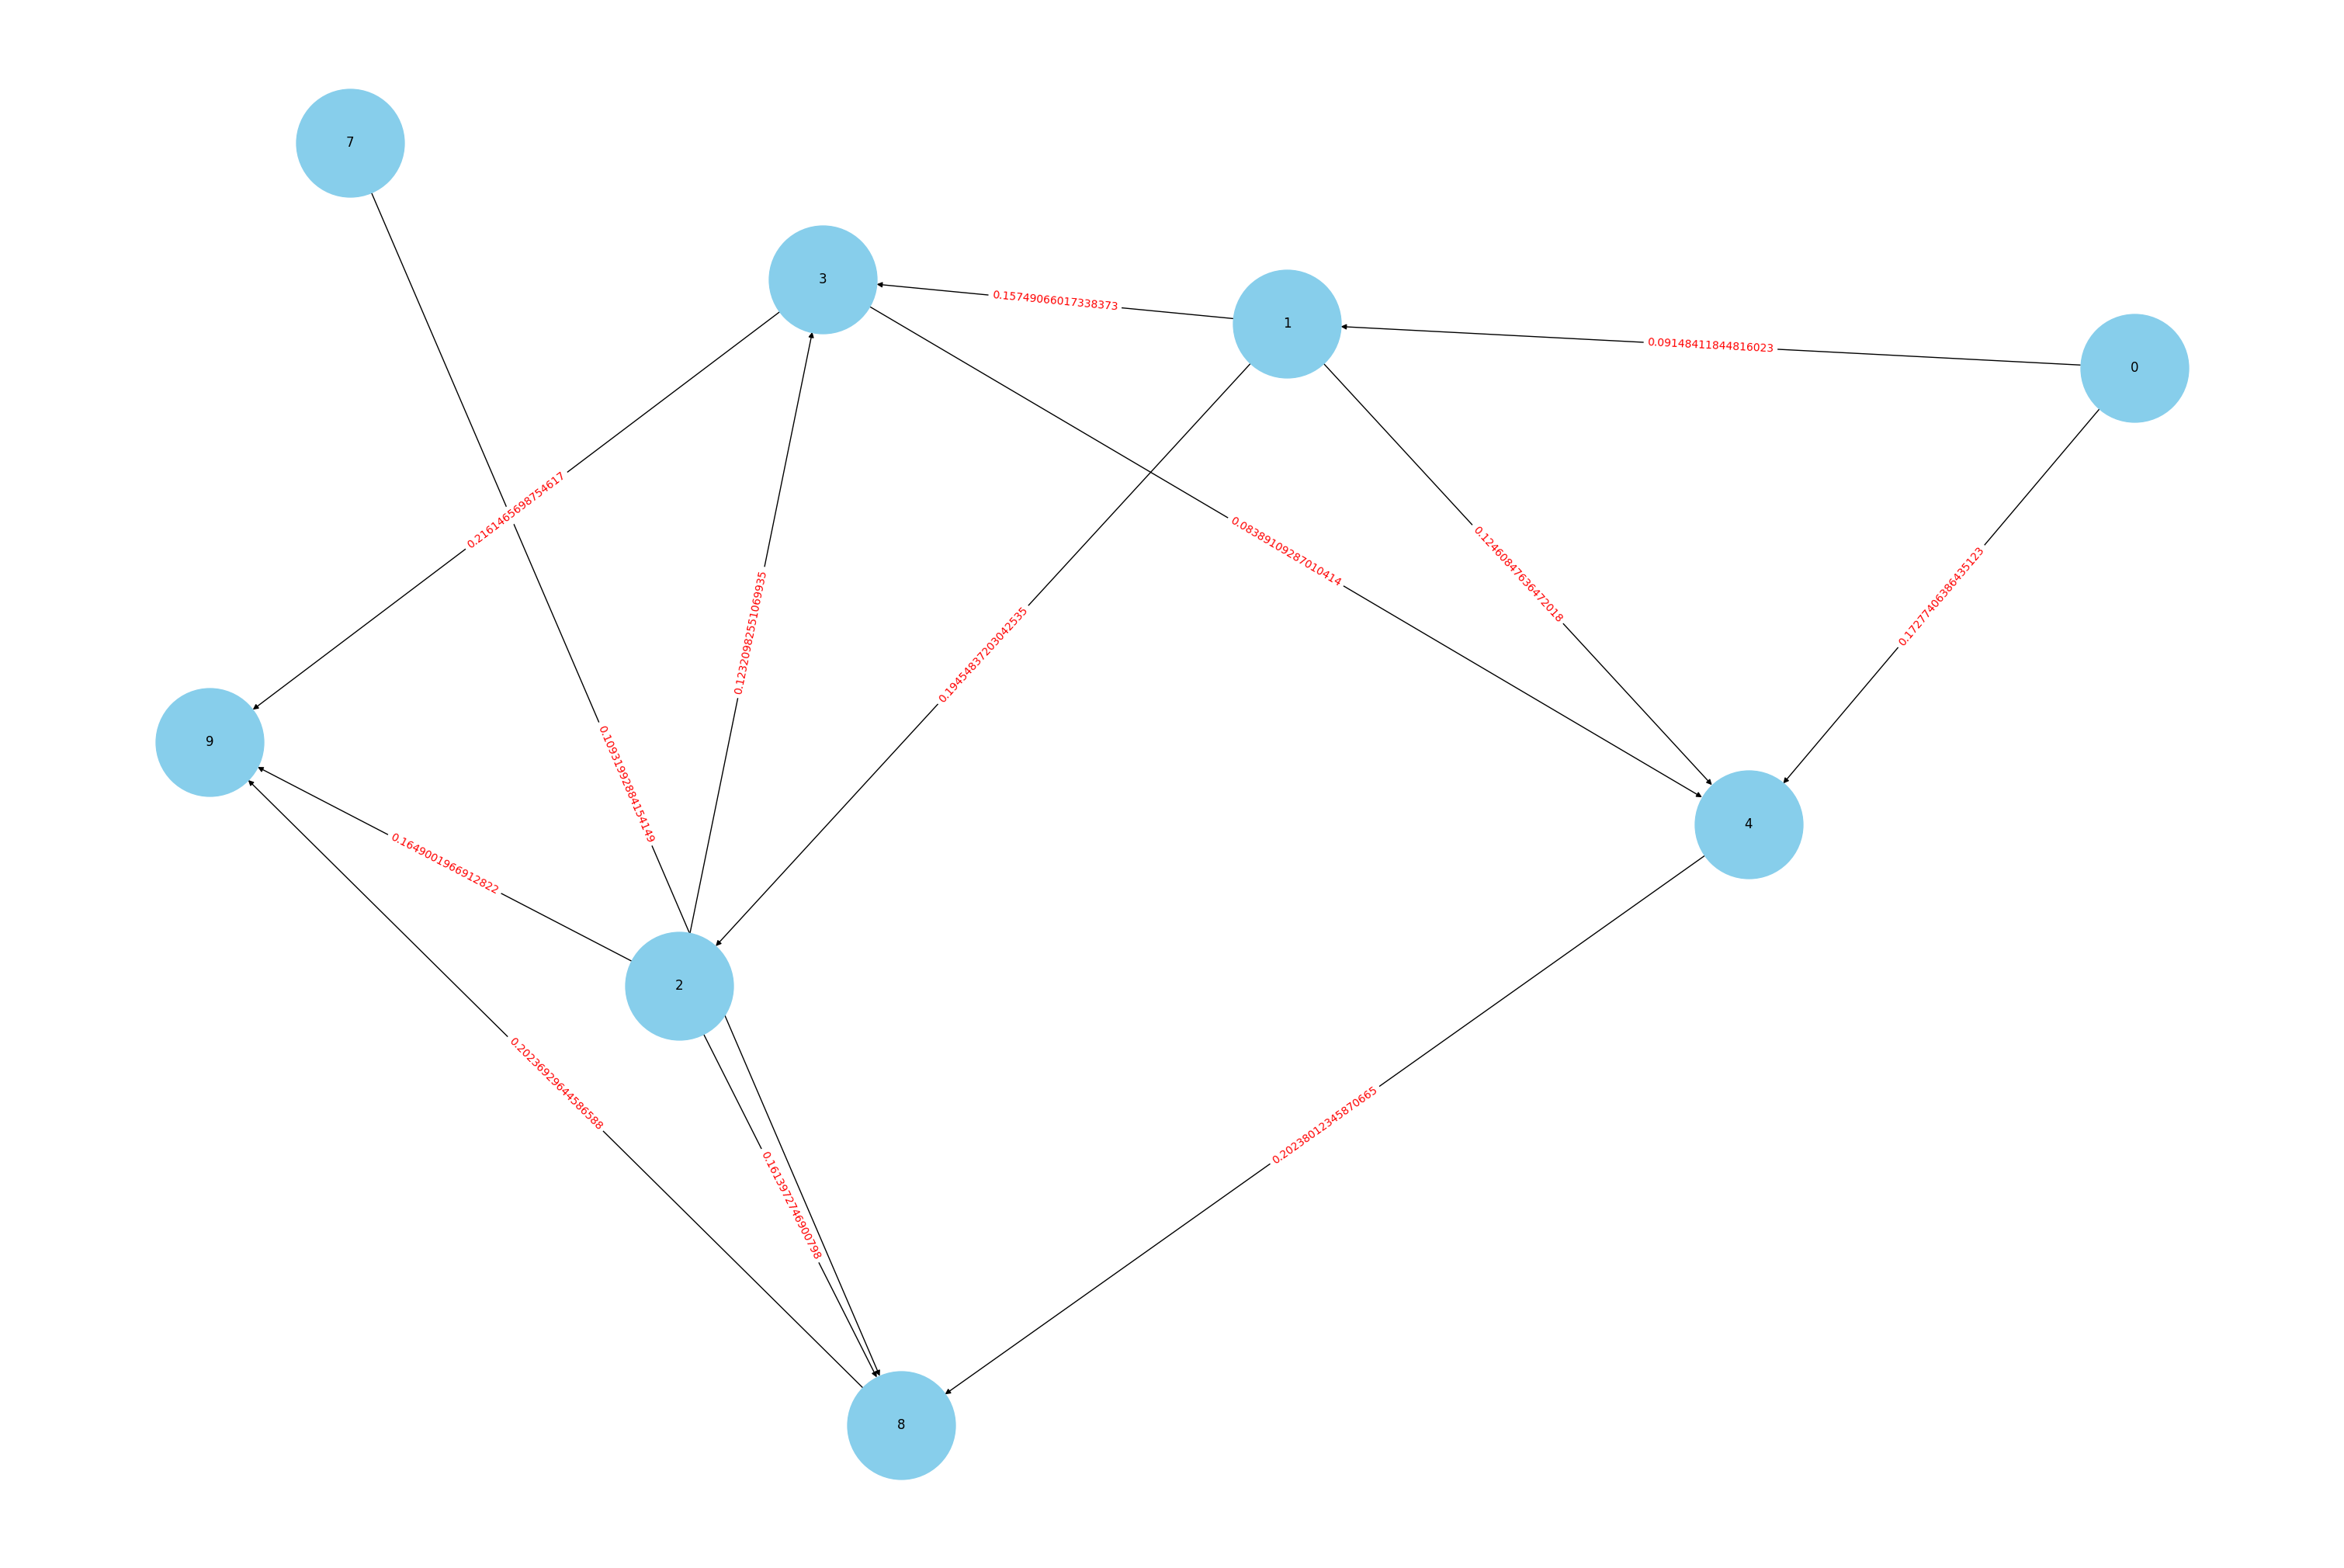



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.07692307692307693
Closenes Centrality Node 5 = 0.27472527472527475
Closenes Centrality Node 8 = 0.2517482517482517
Closenes Centrality Node 9 = 0.37869822485207105
Closenes Centrality Node 11 = 0.6205128205128204
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 3 = 0.07692307692307693
Closenes Centrality Node 4 = 0.10256410256410256
Closenes Centrality Node 6 = 0.0
Closenes Centrality Node 10 = 0.07692307692307693
Closenes Centrality Node 7 = 0.0
Closenes Centrality Node 12 = 0.10256410256410256
Closenes Centrality Node 13 = 0.41025641025641024


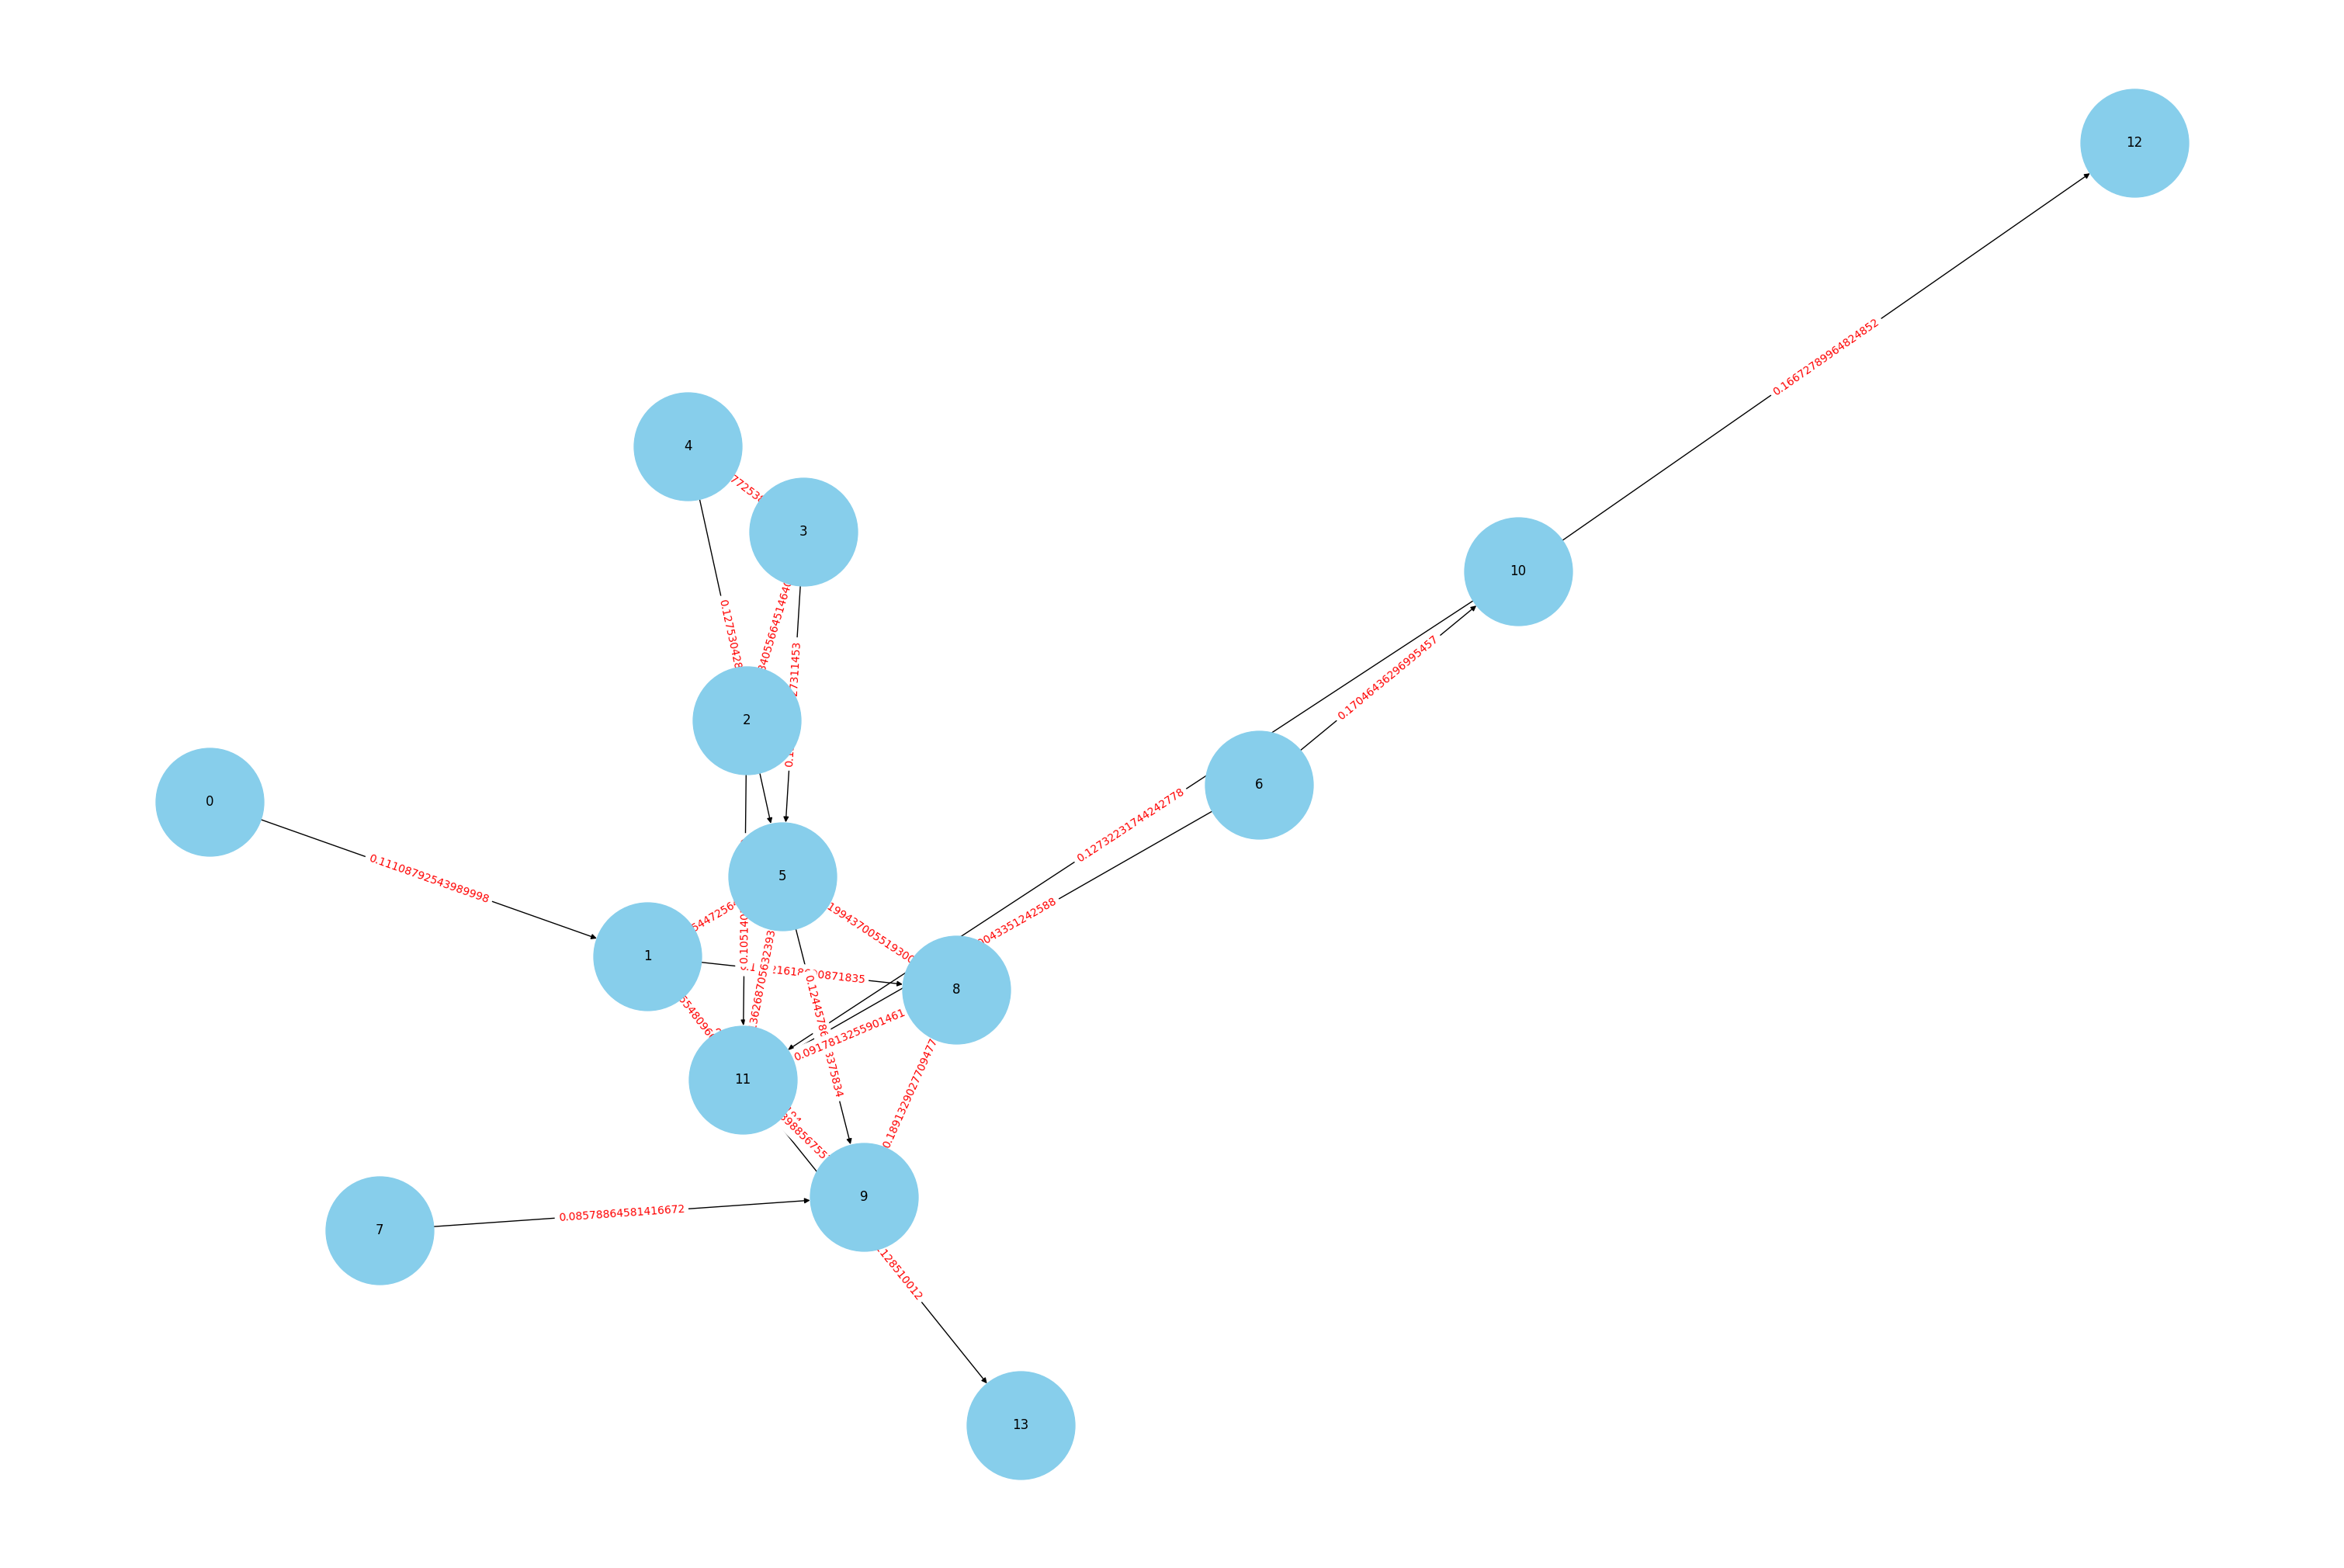



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 2 = 0.1111111111111111
Closenes Centrality Node 4 = 0.3333333333333333
Closenes Centrality Node 3 = 0.14814814814814814
Closenes Centrality Node 7 = 0.39682539682539686
Closenes Centrality Node 8 = 0.25
Closenes Centrality Node 9 = 0.5470085470085471
Closenes Centrality Node 5 = 0.0
Closenes Centrality Node 6 = 0.0


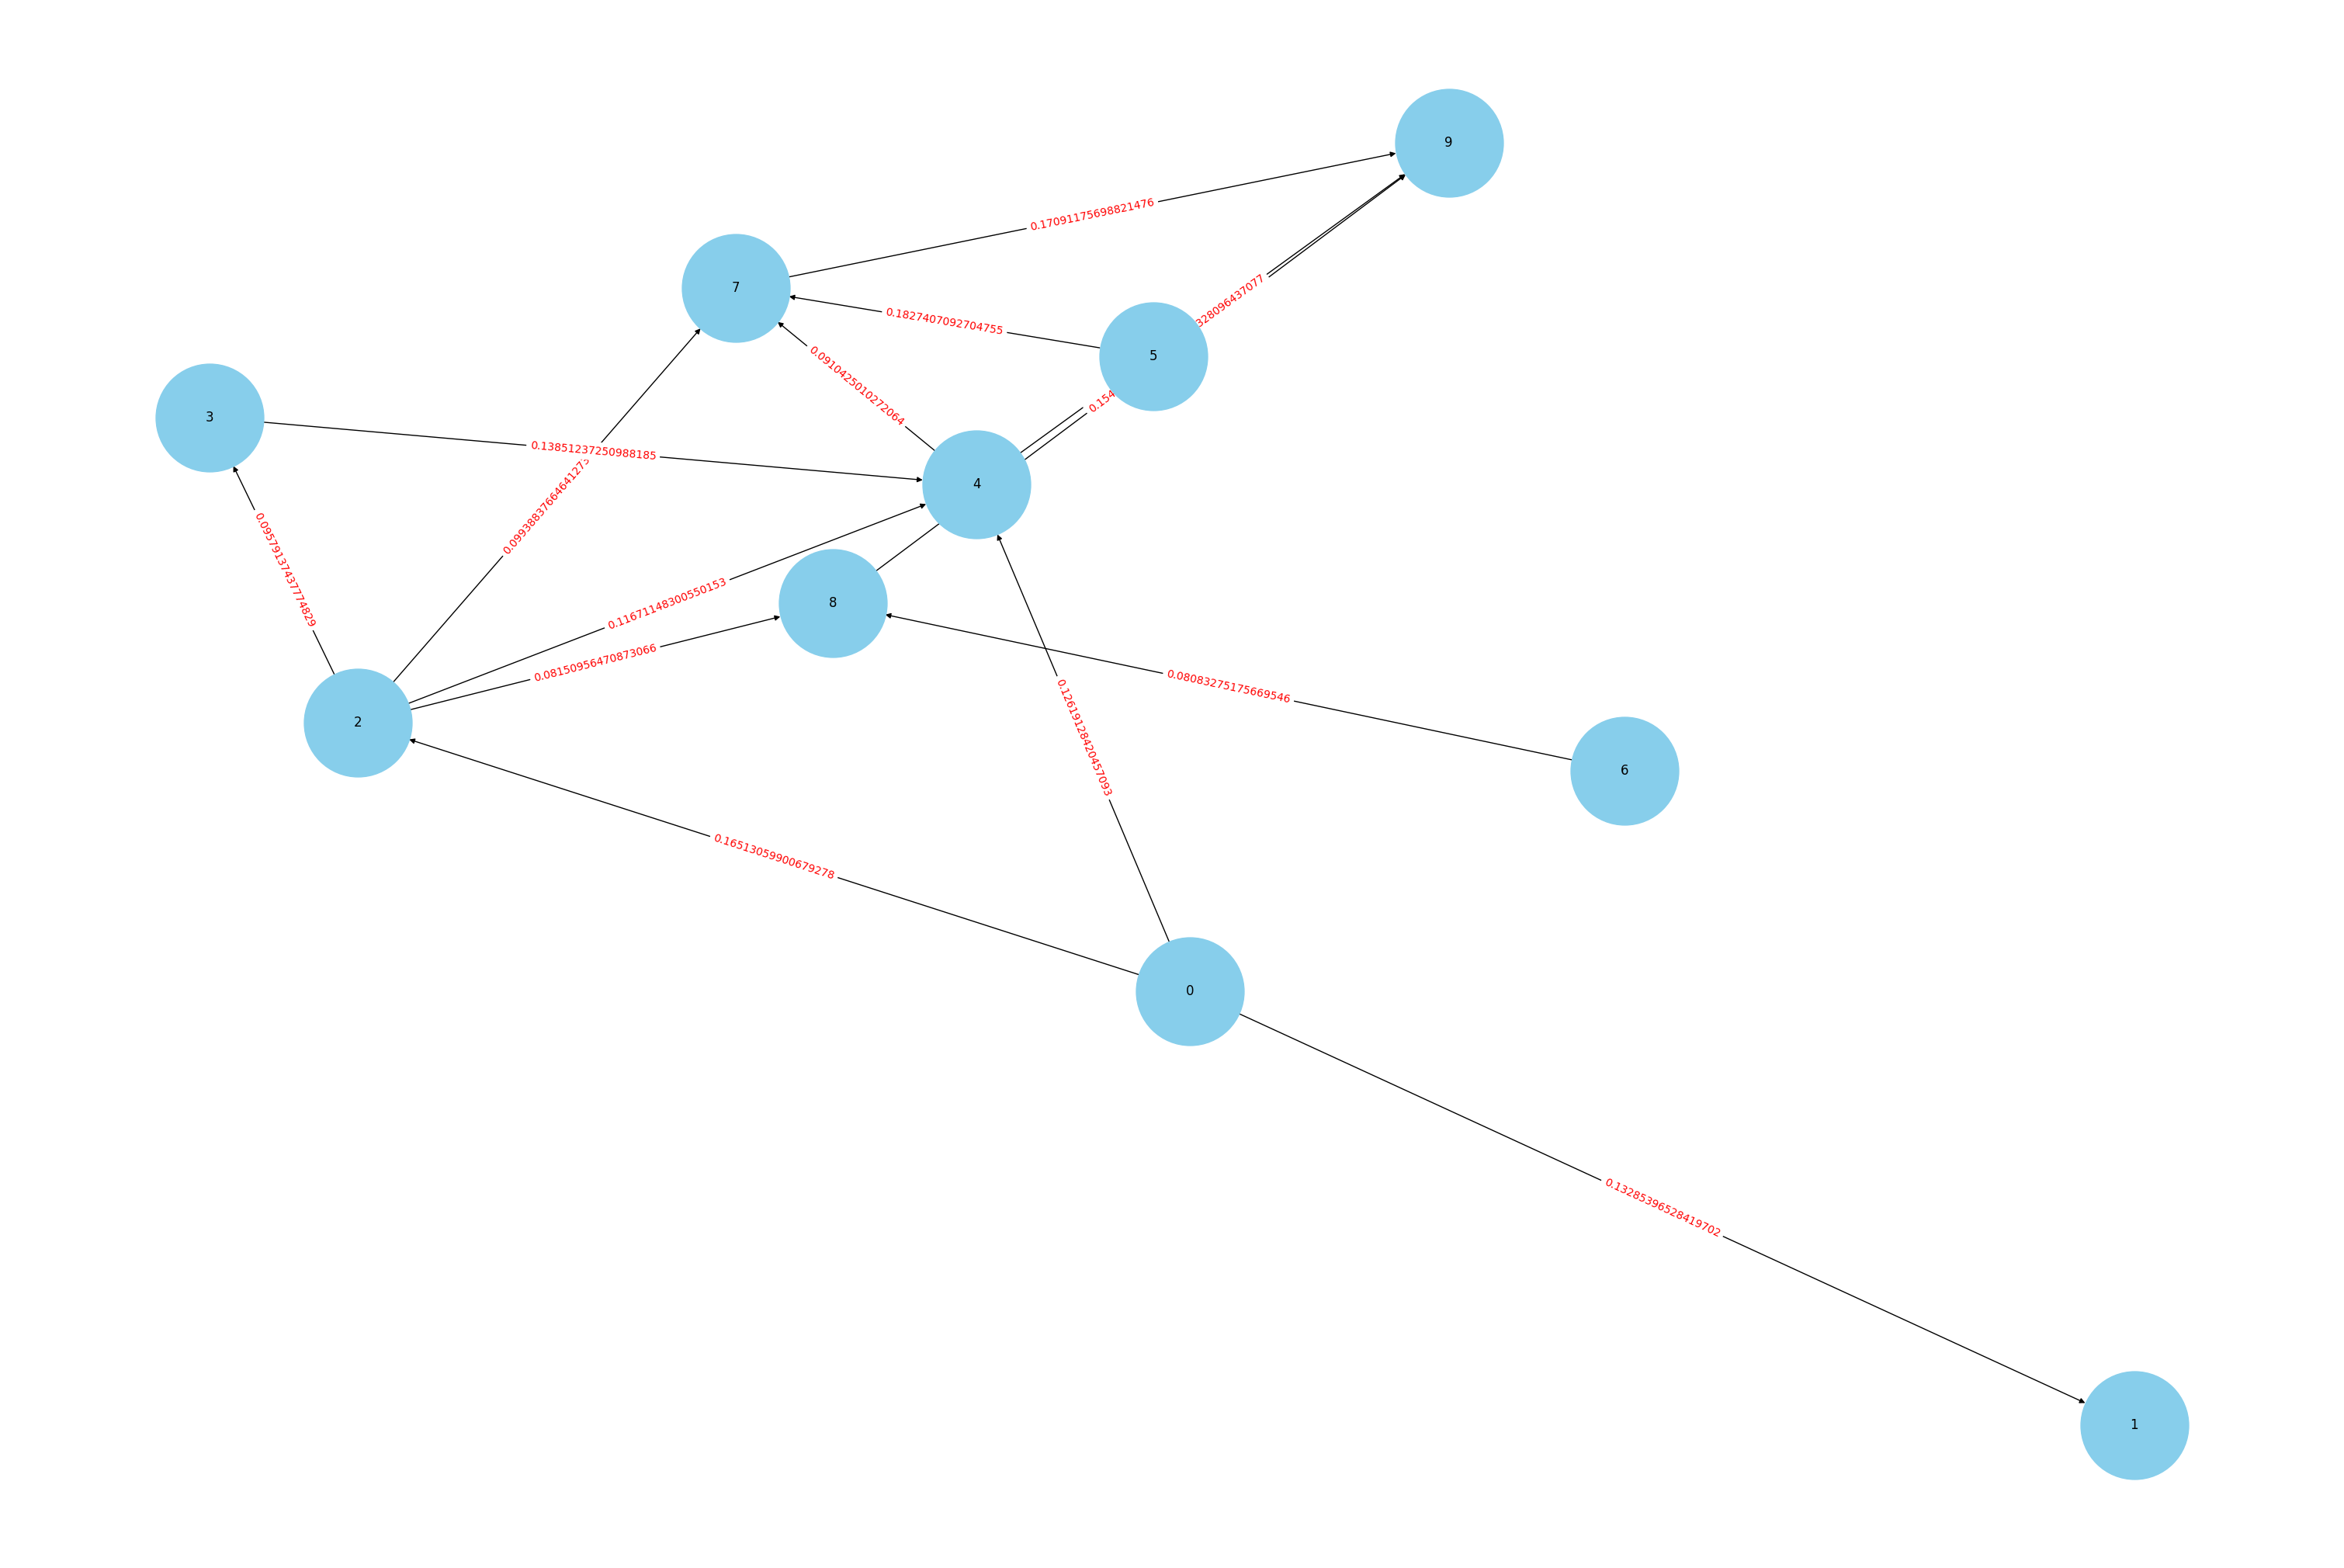

In [50]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

### 6.Summary
Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.

In [53]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(df['tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [54]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = "".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [55]:
summary_result[0]

'meskipun kita tidak bisa membantu datang langsung kesana, setidaknya doa dan bantuan moril serta materiil dapat memberikan keringanan bagi rakyat palestina.pada acara tersebut hadir juga ketua dprd kabupaten sidoarjo usman, ketua pcnu sidoarjo zaenal abidin, ketua baznas kabupaten sidoarjo, seluruh kepala opd yang terkait dan ketua lintang songo foundation.madbupati sidoarjo berharap selain bantuan berupa doa, juga sumbangsih warga sidoarjo berbentuk supporting, moril dan materiil sangat dibutuhkan untuk saudara kita di palestina.wajib bagi kita untuk memberikan doa dengan harapan semoga cobaan yang dialami akan segera diangkat oleh allah swt dan dapat hidup dengan damai, ucapnya.semoga semua amalan kita dicatat oleh allah swt, harapnya.solidaritas kita kepada saudara muslim kita di palestina, bukan hanya berkata dengan agama, tetapi jauh dari itu tema pada saat ini adalah kemanusiaan.melalui doa yang dipanjatkan akan menjadi jembatan kepada allah swt, dengan harapan rakyat palestina 

In [58]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Category']],axis=1)
dataSummary

,Summary,Category
0,meskipun kita tidak bisa membantu datang langs...,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan
...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan


### Save Data

In [61]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Category': df['Category'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'DatasummaryRadarjatim.csv'
fieldnames = ['Summary', 'Category']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file DatasummaryRadarjatim.csv


## **Modelling Data Summary**

### EDA (Explorasi Data Analysis)
proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.

In [62]:
import pandas as pd
import numpy as np

### 1.Read Data

In [63]:
dtsummary = pd.read_csv("/content/DatasummaryRadarjatim.csv")
dtsummary

,Summary,Category
0,meskipun kita tidak bisa membantu datang langs...,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan
...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan


Banyak Dataset

In [69]:
len(dtsummary)

747

### 2.Banyak dataset setiap kelas

In [71]:
# Hitung jumlah kelas
kelas = dtsummary['Category'].value_counts()
kelas

Pendidikan    390
Religi        183
Sosial        174
Name: Category, dtype: int64

## PreProcessing

### 1.Missing Value

In [65]:
dtsummary = dtsummary.dropna()

In [64]:
dtsummary.isna().sum()

Summary     3
Category    0
dtype: int64

### 2. Duplicate Data

In [67]:
dtsummary.duplicated().sum()

54

### 3.Cleaning


#### Punctuation

In [72]:
import string


dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

dtsummary['summary_punct'] = dtsummary['summary_punct'].str.replace('\d+', '', regex=True)

<ipython-input-72-27b9f430ff71>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
<ipython-input-72-27b9f430ff71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
<ipython-input-72-27b9f430ff71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [73]:
dtsummary

,Summary,Category,summary_punct
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...


#### Stopword
Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
#Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

<ipython-input-75-c8d70ebdd1f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


In [76]:
dtsummary

,Summary,Category,summary_punct,summary_stopwords
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...


#### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.

In [77]:
dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)
dtsummary

<ipython-input-77-a03e79ff1886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)


,Summary,Category,summary_punct,summary_stopwords,summary_tokens
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang..."
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak..."
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,..."
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,..."
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ..."
...,...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk..."
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany..."
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul..."
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant..."


In [79]:
# menggabungkan kata
dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))
dtsummary

<ipython-input-79-7f70721b602e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))


,Summary,Category,summary_punct,summary_stopwords,summary_tokens,summary_final
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang...",meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak...",kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,...",fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,...",mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ...",ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk...",daya ungkit secara ekonomi dapat dilakukan lew...
746,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany...",seminar ini diharapkan akan semakin banyak ora...
747,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul...",acara hut ybbs dihadiri semua unsur mulai dari...
748,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant...",mulai dari mengajari anakanak sd membantu di p...


In [80]:
#merubah posisi kolom

dtsummary = dtsummary[['Summary', 'summary_punct', 'summary_stopwords',
            'summary_tokens','Category']]
dtsummary

,Summary,summary_punct,summary_stopwords,summary_tokens,Category
0,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang...",Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak...",Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,...",Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,...",Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ...",Pendidikan
...,...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk...",Pendidikan
746,"seminar ini, diharapkan akan semakin banyak or...",seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany...",Pendidikan
747,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul...",Pendidikan
748,"mulai dari mengajari anakanak sd, membantu di ...",mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant...",Pendidikan


#### Marge
merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh

In [82]:
# menggabungkan kata
dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))
dtsummary

,Summary,summary_punct,summary_stopwords,summary_tokens,Category,summary_final
0,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang...",Religi,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak...",Religi,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,...",Pendidikan,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk...",Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...
746,"seminar ini, diharapkan akan semakin banyak or...",seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...
747,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul...",Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...
748,"mulai dari mengajari anakanak sd, membantu di ...",mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...


### 4.Vector Space Model (VSM)
VSM adalah singkatan dari “Vector Space Model” atau dalam bahasa Indonesia dapat diartikan sebagai “Model Ruang Vektor”. Ini adalah sebuah pendekatan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) yang digunakan untuk merepresentasikan teks dalam bentuk vektor dalam ruang multidimensi.

#### TF-IDF
metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [83]:
dtsummary

,Summary,summary_punct,summary_stopwords,summary_tokens,Category,summary_final
0,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang...",Religi,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak...",Religi,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,...",Pendidikan,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...,...,...
745,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk...",Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...
746,"seminar ini, diharapkan akan semakin banyak or...",seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...
747,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul...",Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...
748,"mulai dari mengajari anakanak sd, membantu di ...",mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...


In [90]:
dtsummary['summary_final'][0]

'meskipun kita tidak bisa membantu datang langsung kesana setidaknya doa dan bantuan moril serta materiil dapat memberikan keringanan bagi rakyat palestina pada acara tersebut hadir juga ketua dprd kabupaten sidoarjo usman ketua pcnu sidoarjo zaenal abidin ketua baznas kabupaten sidoarjo seluruh kepala opd yang terkait dan ketua lintang songo foundationmad bupati sidoarjo berharap selain bantuan berupa doa juga sumbangsih warga sidoarjo berbentuk supporting moril dan materiil sangat dibutuhkan untuk saudara kita di palestina wajib bagi kita untuk memberikan doa dengan harapan semoga cobaan yang dialami akan segera diangkat oleh allah swt dan dapat hidup dengan damai ucapnya semoga semua amalan kita dicatat oleh allah swt harapnya solidaritas kita kepada saudara muslim kita di palestina bukan hanya berkata dengan agama tetapi jauh dari itu tema pada saat ini adalah kemanusiaan melalui doa yang dipanjatkan akan menjadi jembatan kepada allah swt dengan harapan rakyat palestina diberikan p

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
summ_tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
summ_tfidf_matrix = summ_tfidf_vectorizer.fit_transform(dtsummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
summ_tfidf_df = pd.DataFrame(summ_tfidf_matrix.toarray(),columns=summ_tfidf_vectorizer.get_feature_names_out())
summ_tfidf_df = pd.concat([dtsummary['Summary'],summ_tfidf_df,dtsummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
summ_tfidf_df

,Summary,aa,aaakhoru,aaat,aamiin,aamiini,aaron,aau,aba,abaaba,...,عليكم,فصللربكوانحر,قبلكم,كتب,كما,لعلكم,من,وعلمهrasulullah,يا,Category
0,meskipun kita tidak bisa membantu datang langs...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,"mulai dari mengajari anakanak sd, membantu di ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan
749,acara peresmian dan pembukaan perpustakaan ram...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan
76,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
106,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [92]:
summ_tfidf_df.isnull().sum()

Summary            3
aa                 3
aaakhoru           3
aaat               3
aamiin             3
                  ..
لعلكم              3
من                 3
وعلمهrasulullah    3
يا                 3
Category           3
Length: 17329, dtype: int64

In [94]:
summ_tfidf_df = summ_tfidf_df.dropna()
summ_tfidf_df

,Summary,aa,aaakhoru,aaat,aamiin,aamiini,aaron,aau,aba,abaaba,...,عليكم,فصللربكوانحر,قبلكم,كتب,كما,لعلكم,من,وعلمهrasulullah,يا,Category
0,meskipun kita tidak bisa membantu datang langs...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,semoga dari program kerjasama ini dapat mening...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
743,"tentunya, penghargaan ini bisa menjadi motivas...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155301,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
744,peternak juga mendapatkan bantuan peralatan un...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
745,daya ungkit secara ekonomi dapat dilakukan lew...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan


### 5. Modelling

#### Split Dataset

In [95]:
# import library
from sklearn.model_selection import train_test_split

In [96]:
# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = summ_tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = summ_tfidf_df["Category"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

#### KNN

In [102]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [103]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.7046979865771812
